## ***Model to predict the Marks of a student based on the number of hours the student studied***

---



**Importing the required libraries**

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Reading our data from the csv file**

In [166]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Making our data into desired format**

In [167]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values
x=np.array(x).reshape(len(x),1)
y=np.array(y).reshape(len(y),1)
m=x.size



**Visualizing the data**


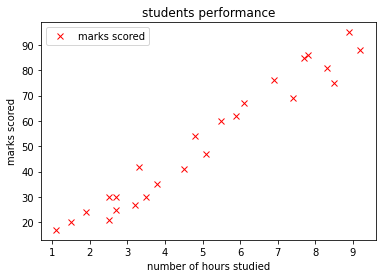

In [168]:
def plotdata(x,y):
  plt.figure()
  plt.plot(x,y,'rx')
  plt.xlabel("number of hours studied")
  plt.ylabel("marks scored")
  plt.title("students performance")
  plt.legend(["marks scored"])
plotdata(x,y)

**Adding the bias term**

In [169]:
X=np.hstack((np.ones((m,1)),x)) #adding  bias term

**Dividing the data into training and testing datasets**

In [170]:
xtrain=X[:20,:]
xtest=X[20:,:]
ytrain=y[:20,:]
ytest=y[20:,:]

**Initializing the weights**

In [171]:
theta=np.zeros((2,1))


**Calculating costfunction**

---



In [172]:
def costfunction(x,y,theta):
  m=x.size
  cost=1/(2*m)*np.sum((x@theta-y)**2)
  return cost
print("initial cost=",costfunction(xtrain,ytrain,theta))

initial cost= 792.35


**Calculating the optimal weights using the method of gradient descent**

In [173]:
def gradientdescent(x,y,theta,lambd,iter):
  m=x.size
  costfun=[]
  for i in range(1,iter+1):
    theta=theta-1/m*lambd*(x.T@(x@theta-y))
    costfun.append(costfunction(x,y,theta))
  return theta,costfun
Theta,costfun=gradientdescent(xtrain,ytrain,theta,0.1,30)
print("optimal Weights = ",Theta)

optimal Weights =  [[1.95359248]
 [9.69198455]]


***Number of iterations vs Cost function***

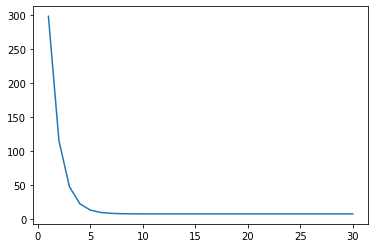

In [174]:
plt.figure()
plt.plot(range(1,31),costfun)

**Plotting and Visualizing our model prediction**

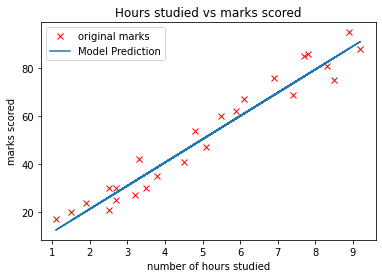

In [175]:
plt.figure()
xtemp=xtest[:,1].reshape(5,1)
plt.plot(x,y,'rx')
plt.plot(x,X@Theta)
plt.title("Hours studied vs marks scored")
plt.xlabel("number of hours studied")
plt.ylabel("marks scored")
plt.legend(["original marks","Model Prediction"])

**Actual Vs Predicted**

In [176]:
ypred=xtest@Theta
df=pd.DataFrame({"Actual":ytest.reshape(5),"Predicted":ypred.reshape(5)})
df

,Actual,Predicted
0,30,28.121951
1,54,48.475118
2,35,38.783134
3,76,68.828286
4,86,77.551072


**Evaluating our model**

we can observe that the traning and testing costfunction are low and nearly same

In [177]:
print("costfunction on training set = ",costfunction(xtrain,ytrain,Theta))
print("costfunction on testing set = ",costfunction(xtest,ytest,Theta))

costfunction on training set =  7.181663811984525
costfunction on testing set =  8.559067826423618
